Import Packages

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [3]:
parent_dir = '../../../data/philosopher/2/'

N = 500
M = 100_000
ITERATIONS = 10
# Load Scala benchmark data
scala_idle_raw_data = pd.read_csv(f'{parent_dir}3/philosopher_akka_actor_benchmark_idle_power.csv')
scala_bench_raw_data = pd.read_csv(f'{parent_dir}3/philosopher_akka_actor_benchmark_power_metrics.csv')

# Load Erlang benchmark data
erlang_idle_raw_data = pd.read_csv(f'{parent_dir}3/philosopher_benchmark_idle_power.csv')
erlang_bench_raw_data = pd.read_csv(f'{parent_dir}3/philosopher_benchmark_power_metrics.csv')

# Replace empty or missing values with "N/A" in non-numeric columns
scala_idle_raw_data.fillna("N/A", inplace=True)
scala_bench_raw_data.fillna("N/A", inplace=True)
erlang_idle_raw_data.fillna("N/A", inplace=True)
erlang_bench_raw_data.fillna("N/A", inplace=True)

Preview the Data

In [4]:
print("Scala Idle Raw Data:")
print(scala_idle_raw_data.shape)
scala_idle_raw_data.head()

Scala Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Tue Apr 15 09:14:48 2025 +0200) (510.22ms ela...,0.3120,0.00323,0.344,0.68,0.10,5.74,45.43 C,Nominal
1,(Tue Apr 15 09:14:49 2025 +0200) (507.12ms ela...,0.2020,0.04060,0.303,0.47,0.14,6.74,45.31 C,Nominal
2,(Tue Apr 15 09:14:49 2025 +0200) (507.87ms ela...,1.1800,0.00000,0.456,1.80,0.30,22.72,45.31 C,Nominal
3,(Tue Apr 15 09:14:50 2025 +0200) (508.34ms ela...,0.0846,0.00000,0.268,0.22,0.04,3.37,44.92 C,Nominal
4,(Tue Apr 15 09:14:50 2025 +0200) (508.92ms ela...,0.0588,0.00000,0.263,0.16,0.04,3.03,44.92 C,Nominal


In [5]:
print("Scala Benchmark Raw Data:")
print(scala_bench_raw_data.shape)
scala_bench_raw_data.head()

Scala Benchmark Raw Data:
(501, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Tue Apr 15 09:15:00 2025 +0200) (1009.36ms el...,33.8,0.0226,0.885,34.57,3.91,98.34,47.18 C,Nominal
1,(Tue Apr 15 09:15:01 2025 +0200) (1006.31ms el...,33.2,0.0000,0.427,33.77,3.92,98.65,50.49 C,Nominal
2,(Tue Apr 15 09:15:02 2025 +0200) (1006.76ms el...,32.9,0.0000,0.404,33.43,3.91,98.64,52.80 C,Nominal
3,(Tue Apr 15 09:15:03 2025 +0200) (1005.69ms el...,33.5,0.0110,0.489,34.08,3.93,98.77,54.63 C,Nominal
4,(Tue Apr 15 09:15:04 2025 +0200) (1006.41ms el...,34.8,0.0288,0.707,35.61,3.96,99.31,56.51 C,Nominal


In [6]:
print("Erlang Idle Raw Data:")
print(erlang_idle_raw_data.shape)
erlang_idle_raw_data.head()

Erlang Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Tue Apr 15 08:34:47 2025 +0200) (510.00ms ela...,0.2250,0.000,0.508,2.12,0.10,7.46,56.53 C,Nominal
1,(Tue Apr 15 08:34:47 2025 +0200) (508.72ms ela...,0.0678,0.029,0.531,1.98,0.04,3.01,56.53 C,Nominal
2,(Tue Apr 15 08:34:48 2025 +0200) (507.37ms ela...,1.0800,0.000,0.530,2.98,0.20,15.63,56.44 C,Nominal
3,(Tue Apr 15 08:34:48 2025 +0200) (508.73ms ela...,0.0689,0.000,0.501,1.91,0.04,2.86,56.44 C,Nominal
4,(Tue Apr 15 08:34:49 2025 +0200) (507.78ms ela...,0.0495,0.000,0.498,1.92,0.04,2.48,56.32 C,Nominal


In [7]:
print("Erlang Benchmark Raw Data:")
print(erlang_bench_raw_data.shape)
erlang_bench_raw_data.head()

Erlang Benchmark Raw Data:
(1654, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Tue Apr 15 08:34:58 2025 +0200) (1007.09ms el...,28.1,0.0000,0.658,30.27,3.76,96.83,59.10 C,Nominal
1,(Tue Apr 15 08:34:59 2025 +0200) (1003.49ms el...,28.8,0.0363,0.792,31.12,3.77,97.70,62.13 C,Nominal
2,(Tue Apr 15 08:35:00 2025 +0200) (1003.79ms el...,28.2,0.0164,0.661,30.41,3.81,97.68,64.79 C,Nominal
3,(Tue Apr 15 08:35:01 2025 +0200) (1004.41ms el...,28.2,0.0000,0.637,30.33,3.79,97.26,67.11 C,Nominal
4,(Tue Apr 15 08:35:02 2025 +0200) (1004.75ms el...,28.7,0.0190,0.731,31.00,3.85,97.95,69.17 C,Nominal


Clean the Data

In [8]:
def clean_data(df):
    df_copy = df.copy() 
    
    # Convert Timestamp to datetime format (extract date-time pattern)
    df_copy['Timestamp'] = pd.to_datetime(
        df['Timestamp'].str.extract(r'(\w{3} \w{3} \d{1,2} \d{2}:\d{2}:\d{2} \d{4})')[0], 
        errors='coerce'
    )

    # Extract elapsed time in milliseconds
    df_copy['Time Elapsed (ms)'] = pd.to_numeric(
        df['Timestamp'].str.extract(r'\((\d+\.\d+)ms elapsed\)')[0], 
        errors='coerce'
    )
    
    # Extract numeric temperature values
    df_copy['CPU Temp(C)'] = df['CPU Temp(C)'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

    # Fill N/A values with 0 for numerical columns
    df_copy = df_copy.fillna(0)
    
    return df_copy

In [9]:
scala_idle_data = clean_data(scala_idle_raw_data)
scala_bench_data = clean_data(scala_bench_raw_data)
erlang_idle_data = clean_data(erlang_idle_raw_data)
erlang_bench_data = clean_data(erlang_bench_raw_data)

Verify Cleaned Data

In [10]:
print("Scala Idle Clean Data:")
print(scala_idle_data.shape)
scala_idle_data.head()

Scala Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-15 09:14:48,0.3120,0.00323,0.344,0.68,0.10,5.74,45.43,Nominal,510.22
1,2025-04-15 09:14:49,0.2020,0.04060,0.303,0.47,0.14,6.74,45.31,Nominal,507.12
2,2025-04-15 09:14:49,1.1800,0.00000,0.456,1.80,0.30,22.72,45.31,Nominal,507.87
3,2025-04-15 09:14:50,0.0846,0.00000,0.268,0.22,0.04,3.37,44.92,Nominal,508.34
4,2025-04-15 09:14:50,0.0588,0.00000,0.263,0.16,0.04,3.03,44.92,Nominal,508.92


In [11]:
print("Scala Benchmark Clean Data:")
print(scala_bench_data.shape)
scala_bench_data.head()


Scala Benchmark Clean Data:
(501, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-15 09:15:00,33.8,0.0226,0.885,34.57,3.91,98.34,47.18,Nominal,1009.36
1,2025-04-15 09:15:01,33.2,0.0000,0.427,33.77,3.92,98.65,50.49,Nominal,1006.31
2,2025-04-15 09:15:02,32.9,0.0000,0.404,33.43,3.91,98.64,52.80,Nominal,1006.76
3,2025-04-15 09:15:03,33.5,0.0110,0.489,34.08,3.93,98.77,54.63,Nominal,1005.69
4,2025-04-15 09:15:04,34.8,0.0288,0.707,35.61,3.96,99.31,56.51,Nominal,1006.41


In [12]:
print("Erlang Idle Clean Data:")
print(erlang_idle_data.shape)
erlang_idle_data.head()


Erlang Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-15 08:34:47,0.2250,0.000,0.508,2.12,0.10,7.46,56.53,Nominal,510.00
1,2025-04-15 08:34:47,0.0678,0.029,0.531,1.98,0.04,3.01,56.53,Nominal,508.72
2,2025-04-15 08:34:48,1.0800,0.000,0.530,2.98,0.20,15.63,56.44,Nominal,507.37
3,2025-04-15 08:34:48,0.0689,0.000,0.501,1.91,0.04,2.86,56.44,Nominal,508.73
4,2025-04-15 08:34:49,0.0495,0.000,0.498,1.92,0.04,2.48,56.32,Nominal,507.78


In [13]:
print("Erlang Benchmark Clean Data:")
print(erlang_bench_data.shape)
erlang_bench_data.head()

Erlang Benchmark Clean Data:
(1654, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-04-15 08:34:58,28.1,0.0000,0.658,30.27,3.76,96.83,59.10,Nominal,1007.09
1,2025-04-15 08:34:59,28.8,0.0363,0.792,31.12,3.77,97.70,62.13,Nominal,1003.49
2,2025-04-15 08:35:00,28.2,0.0164,0.661,30.41,3.81,97.68,64.79,Nominal,1003.79
3,2025-04-15 08:35:01,28.2,0.0000,0.637,30.33,3.79,97.26,67.11,Nominal,1004.41
4,2025-04-15 08:35:02,28.7,0.0190,0.731,31.00,3.85,97.95,69.17,Nominal,1004.75


Visualize the Data

In [14]:
def plot_graphs(idle_df, bench_df, title_prefix):
    """
    Creates side-by-side subplots for each metric, plotting idle (left) and benchmark (right),
    using elapsed time on the x-axis.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    idle_df = idle_df.copy()
    bench_df = bench_df.copy()
    

    # Compute elapsed time starting from t=0
    idle_df["Elapsed Time (s)"] = (idle_df["Time Elapsed (ms)"].cumsum() - idle_df["Time Elapsed (ms)"].iloc[0]) / 1000
    bench_df["Elapsed Time (s)"] = (bench_df["Time Elapsed (ms)"].cumsum() - bench_df["Time Elapsed (ms)"].iloc[0]) / 1000

    for column in columns_to_plot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Plot Idle data on the first subplot
        sns.lineplot(data=idle_df, x="Elapsed Time (s)", y=column, label="Idle", color='blue', linestyle='--', ax=axes[0])
        axes[0].set_title(f"Idle - {column}", fontsize=12)
        axes[0].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[0].set_ylabel(column, fontsize=10)
        axes[0].legend()
        axes[0].grid(True)

        # Plot Benchmark data on the second subplot
        sns.lineplot(data=bench_df, x="Elapsed Time (s)", y=column, label="Benchmark", color='red', ax=axes[1])
        axes[1].set_title(f"Benchmark - {column}", fontsize=12)
        axes[1].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[1].set_ylabel(column, fontsize=10)
        axes[1].legend()
        axes[1].grid(True)

        # Main figure title
        fig.suptitle(f"{title_prefix} - {column}", fontsize=14)
        
        # Adjust layout to avoid overlap
        plt.tight_layout(rect=[0, 0, 1, 0.95]) 
        plt.show()


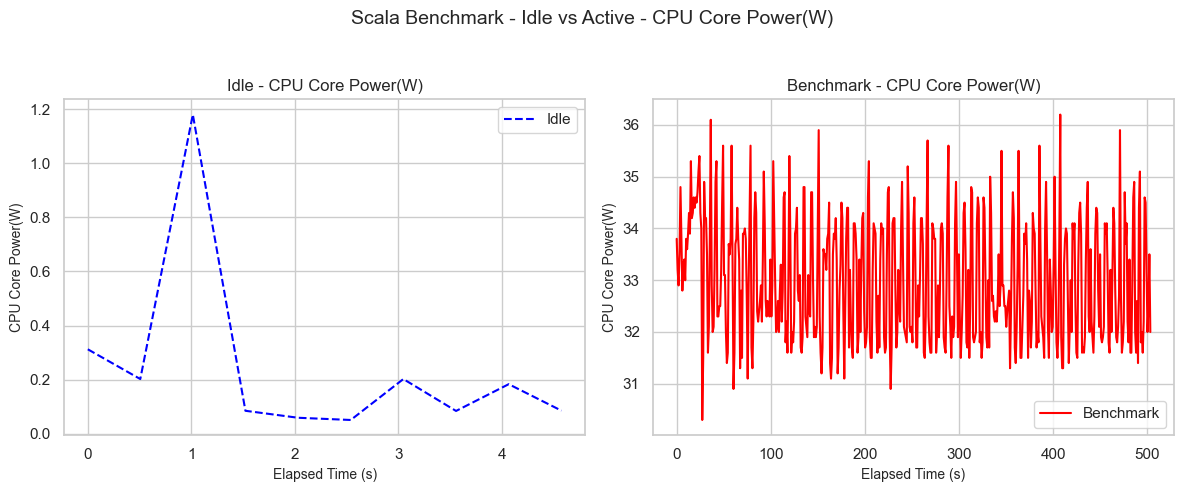

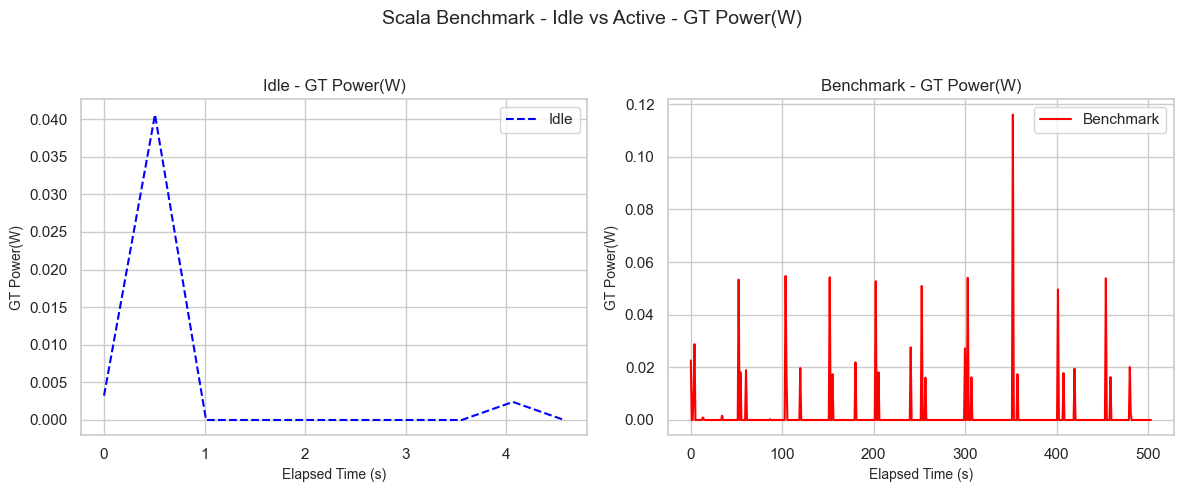

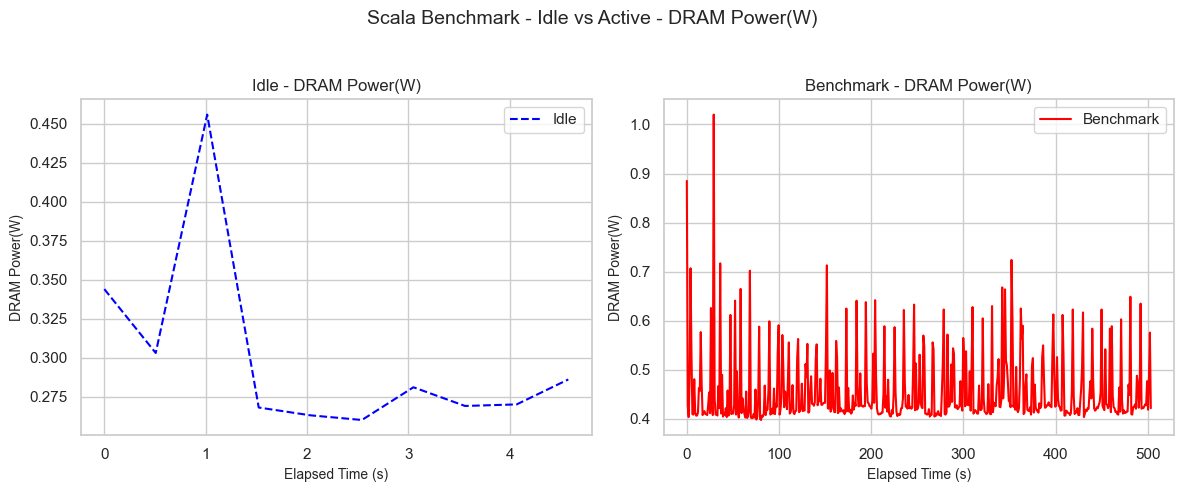

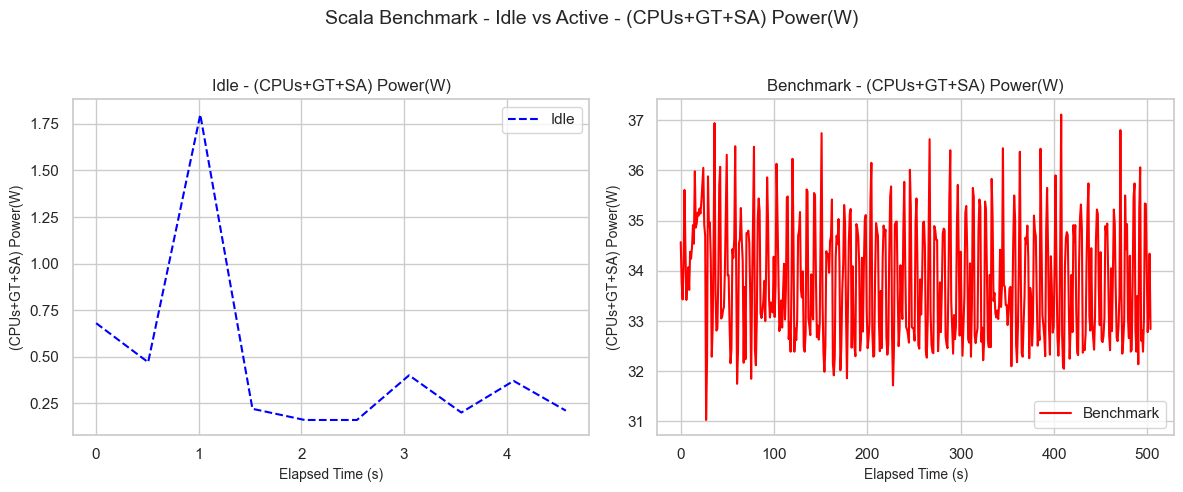

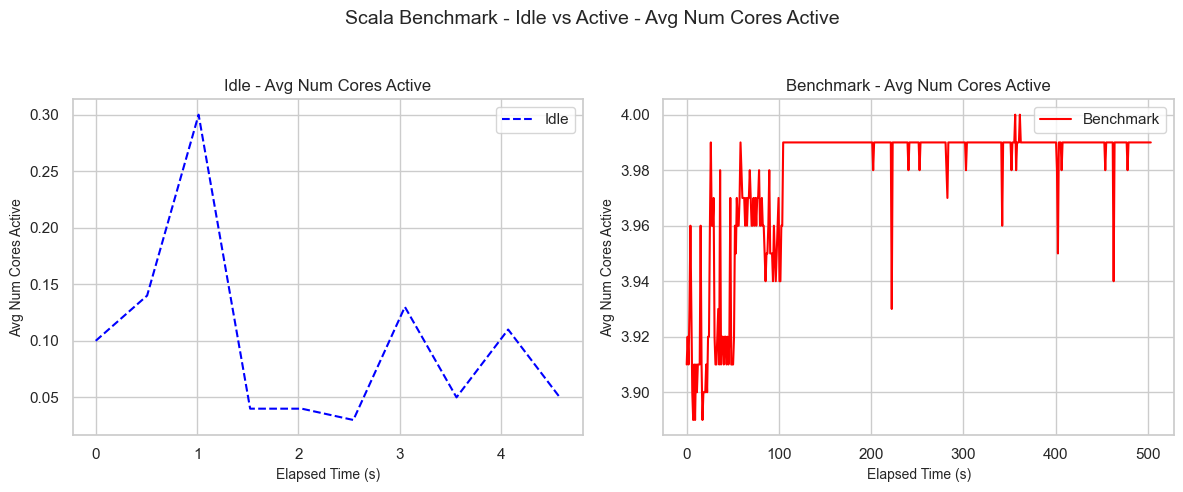

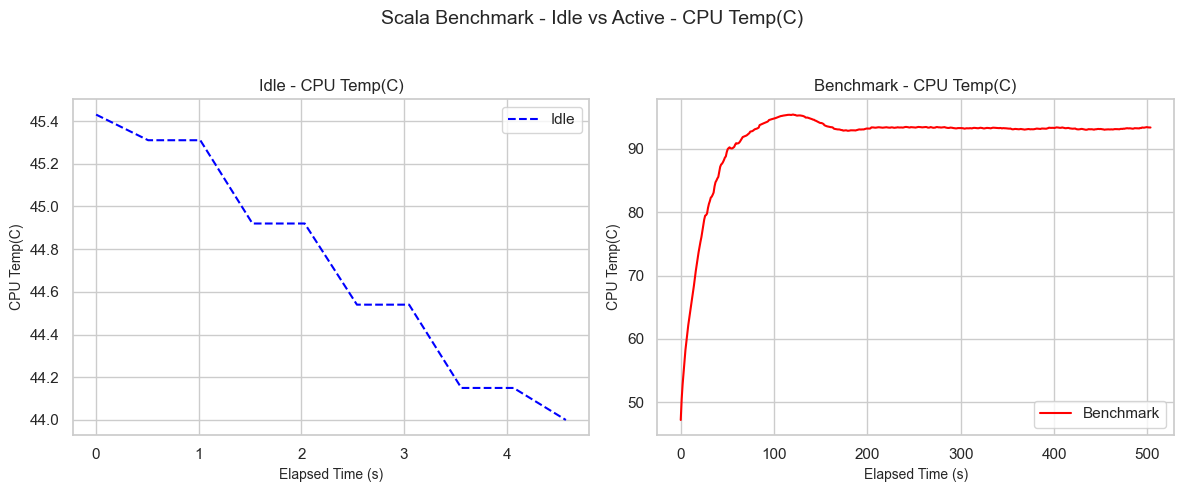

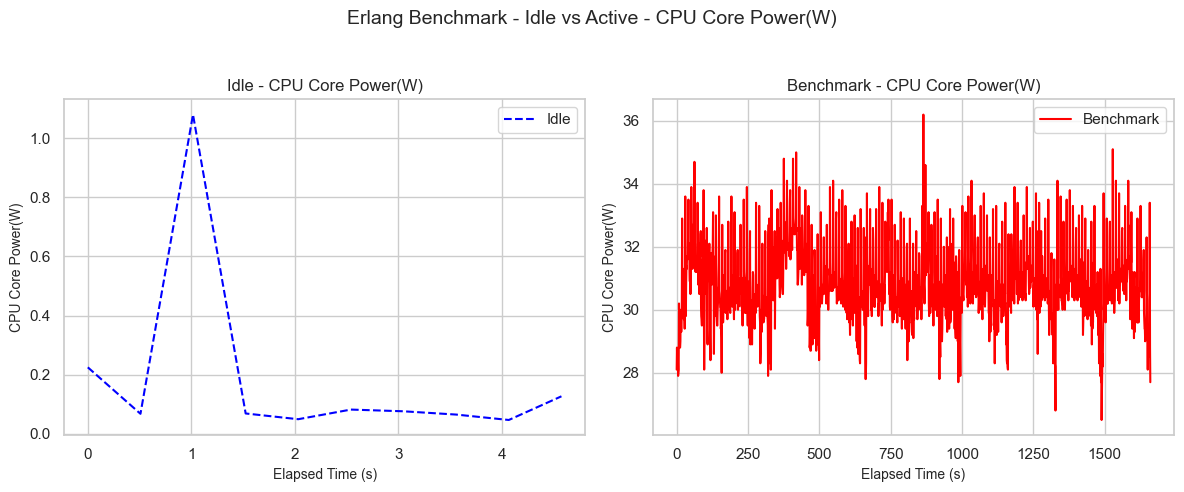

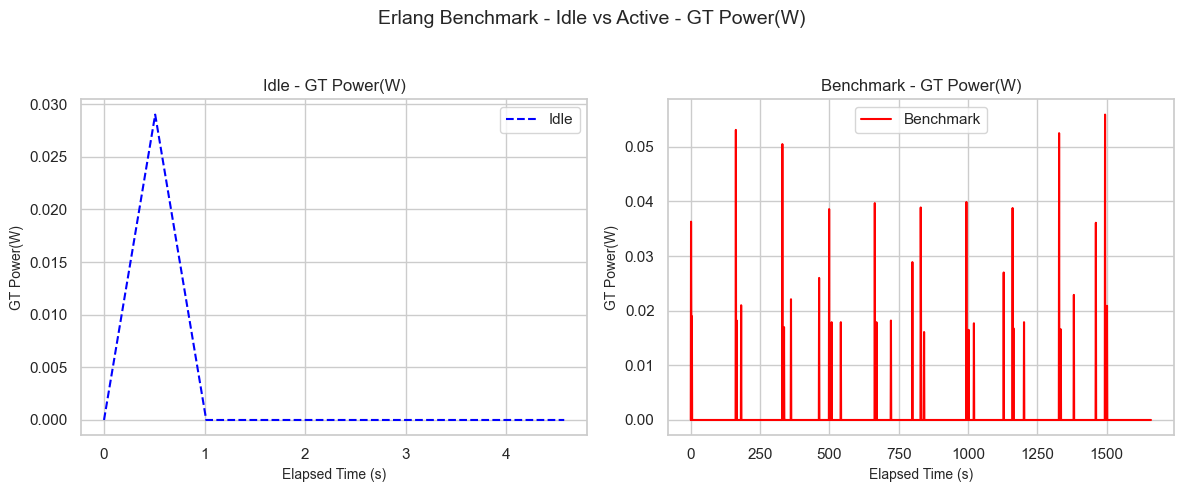

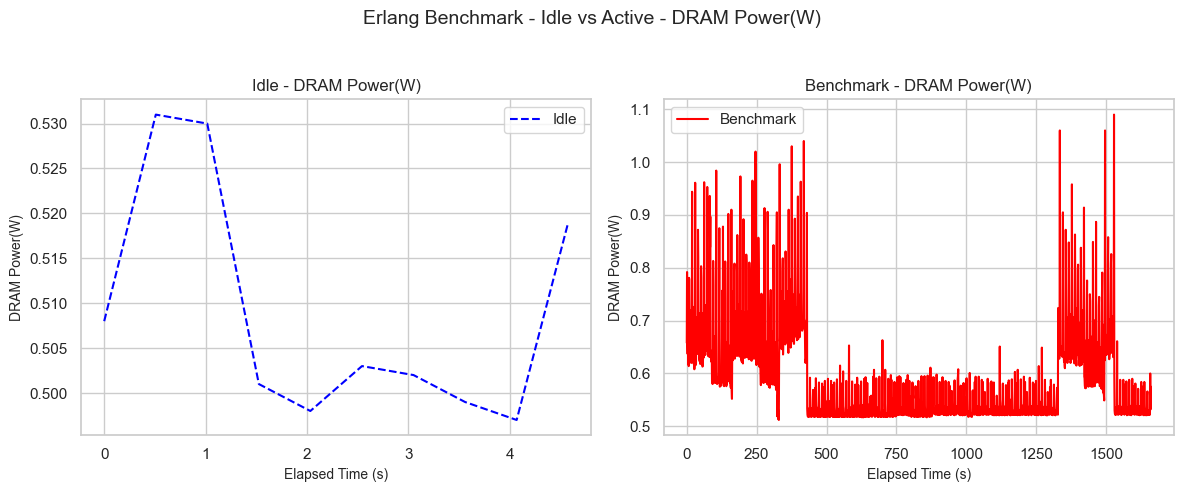

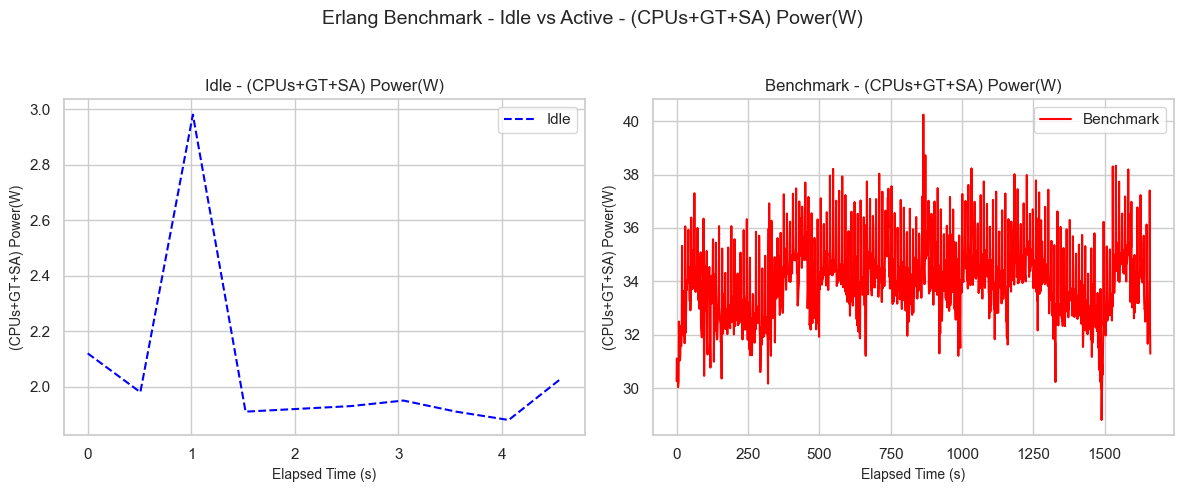

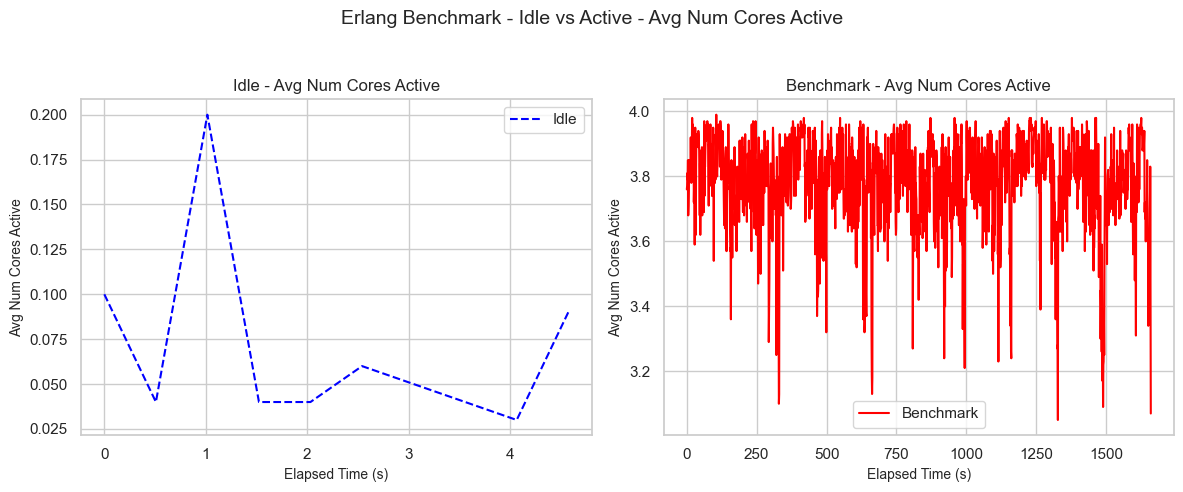

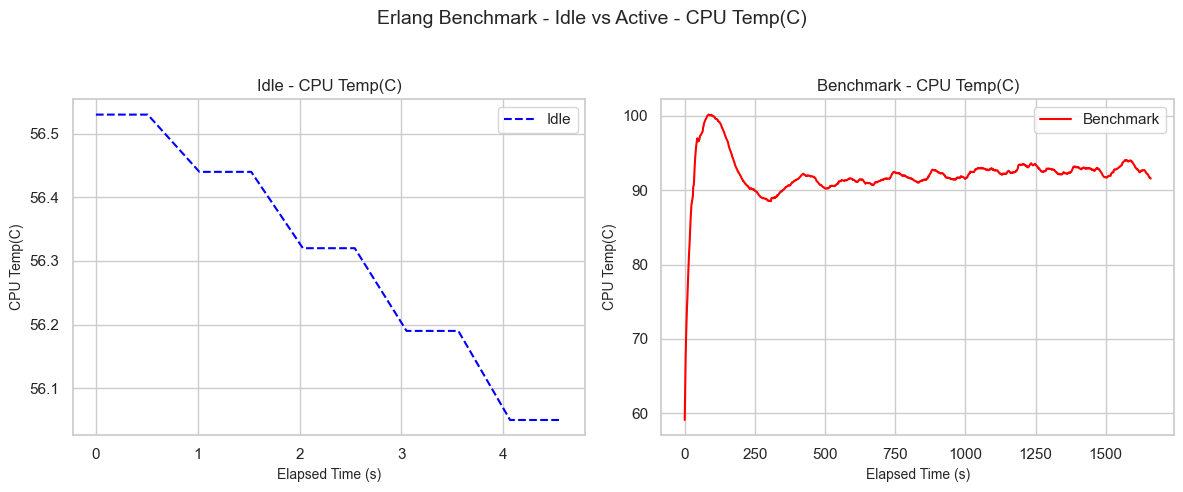

In [15]:
plot_graphs(scala_idle_data, scala_bench_data, "Scala Benchmark - Idle vs Active")
plot_graphs(erlang_idle_data, erlang_bench_data, "Erlang Benchmark - Idle vs Active")

In [16]:
def plot_erlang_vs_scala(erlang_df, scala_df, idle_erlang_df, idle_scala_df, title_prefix):
    """
    Plots Erlang and Scala benchmark data with elapsed time starting at t=0,
    after subtracting corresponding idle values.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    erlang_df = erlang_df.copy()
    scala_df = scala_df.copy()

    # Normalize elapsed time to start from t=0
    erlang_df["Elapsed Time (s)"] = (erlang_df["Time Elapsed (ms)"].cumsum() - erlang_df["Time Elapsed (ms)"].iloc[0]) / 1000
    scala_df["Elapsed Time (s)"] = (scala_df["Time Elapsed (ms)"].cumsum() - scala_df["Time Elapsed (ms)"].iloc[0]) / 1000


    for column in columns_to_plot:
        fig, ax = plt.subplots(figsize=(10, 5))

        # Subtract idle values
        erlang_df["Adjusted " + column] = np.maximum(0, erlang_df[column] - idle_erlang_df[column].mean())
        scala_df["Adjusted " + column] = np.maximum(0, scala_df[column] - idle_scala_df[column].mean())

        # Plot Erlang benchmark
        sns.lineplot(data=erlang_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Erlang", color='blue', ax=ax)

        # Plot Scala benchmark
        sns.lineplot(data=scala_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Scala", color='red', ax=ax)

        # Main figure title
        ax.set_title(f"{title_prefix} - {column}", fontsize=14)
        ax.set_xlabel("Elapsed Time (s)", fontsize=12)
        ax.set_ylabel(column, fontsize=12)
        ax.legend()
        ax.grid(True)

        plt.tight_layout()
        plt.show()


In [17]:
def format_number_str(num):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if num >= 1_000_000_000:
        return f"{num // 1_000_000_000}B"
    elif num >= 1_000_000:
        return f"{num // 1_000_000}M"
    elif num >= 1_000:
        return f"{num // 1_000}K"
    return str(num)

n = format_number_str(N)
m = format_number_str(M)
title_config_prefix = f"({n} Philosophers, {m} Eating Rounds, {ITERATIONS} Iterations)"

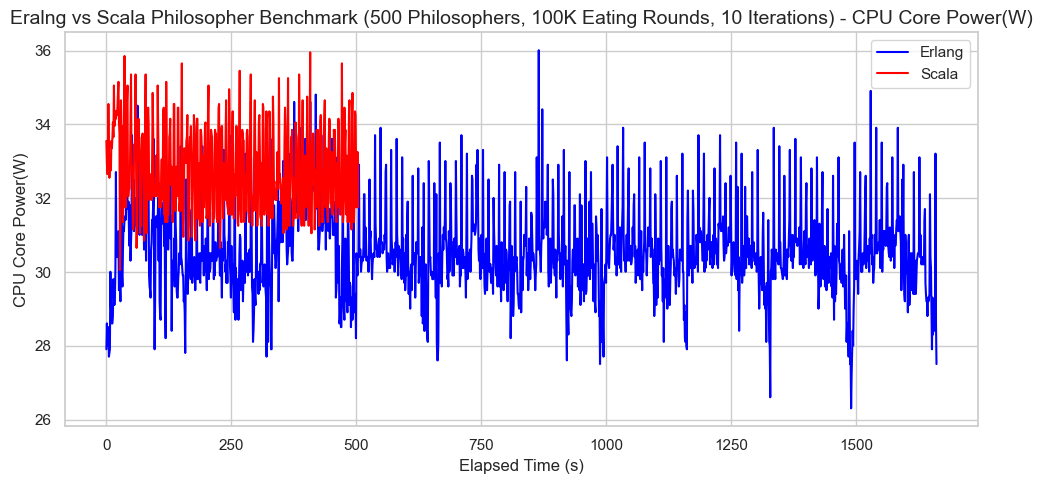

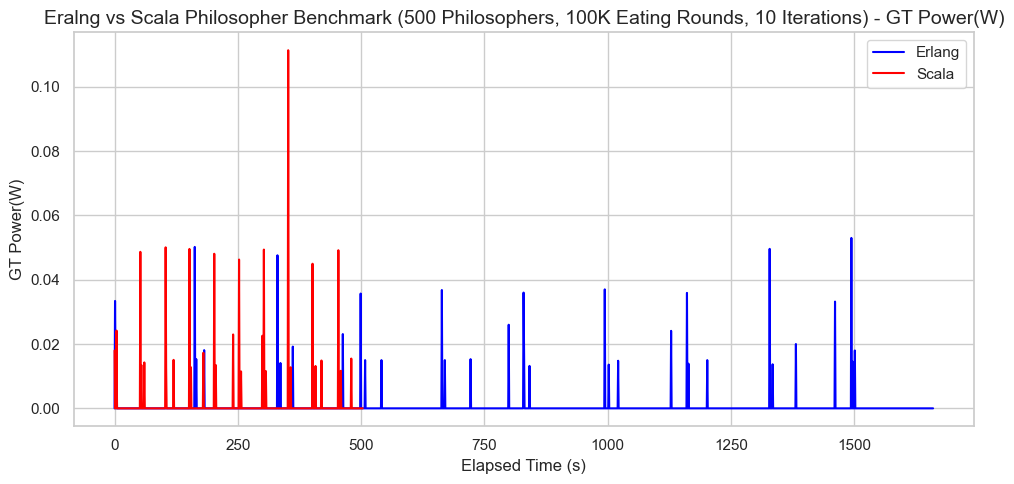

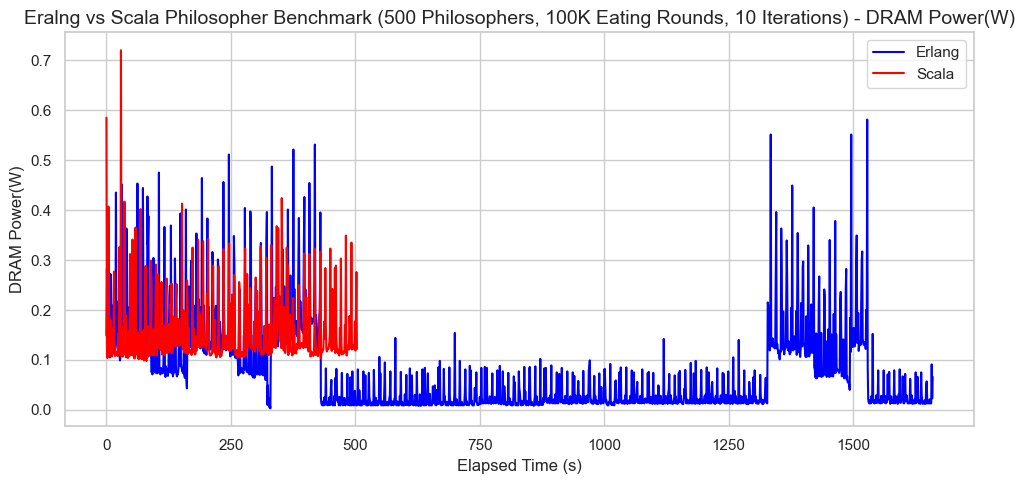

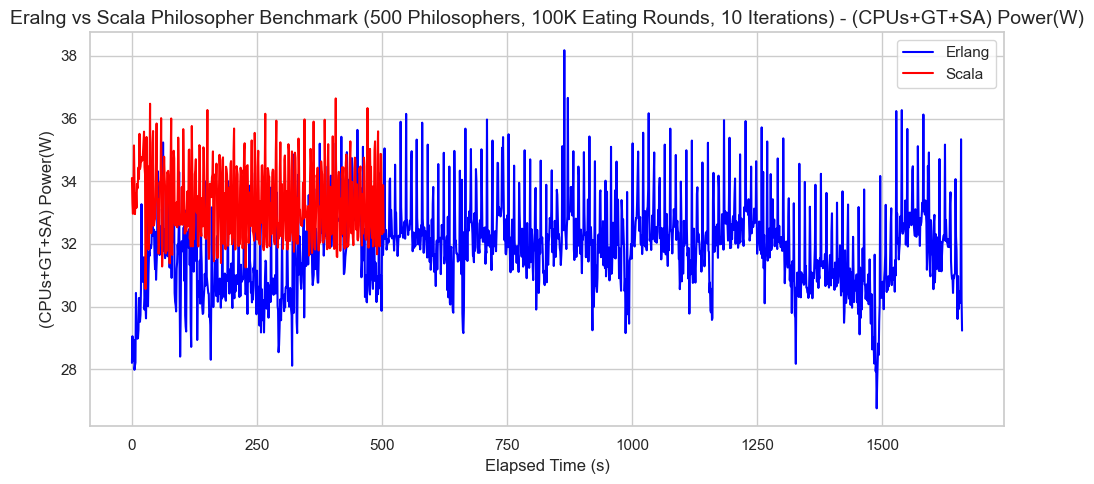

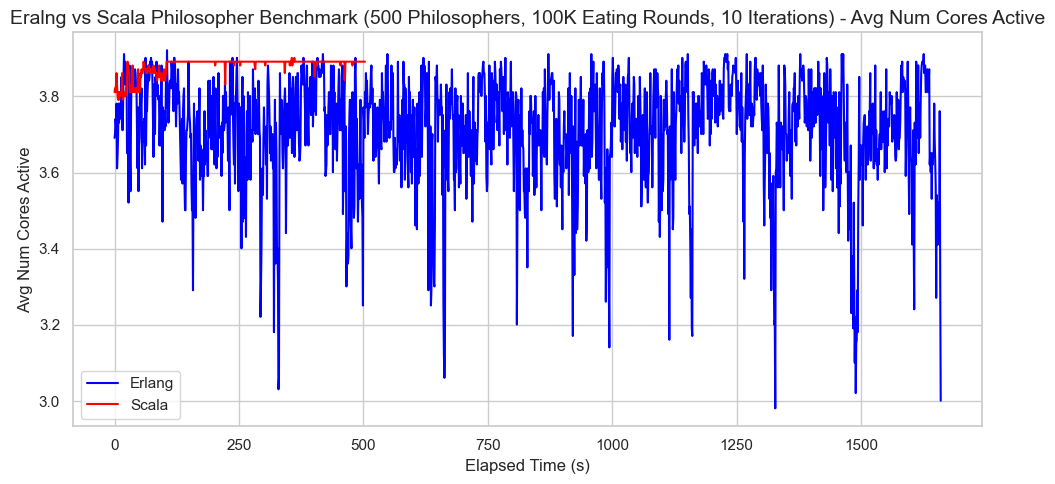

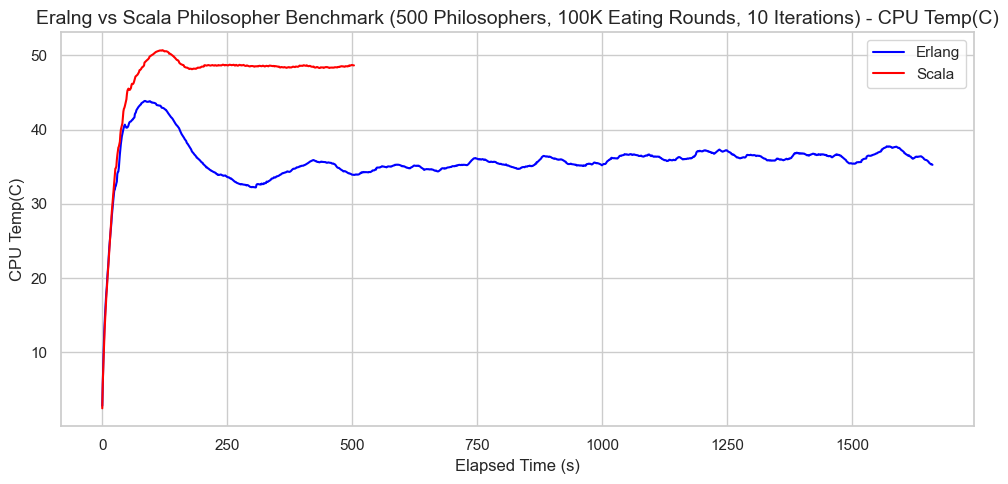

In [18]:
plot_erlang_vs_scala(erlang_bench_data, scala_bench_data, erlang_idle_data, scala_idle_data, f"Eralng vs Scala Philosopher Benchmark {title_config_prefix}")


Compute Average Metrics

In [19]:
metrics_columns = ["CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", "(CPUs+GT+SA) Power(W)","CPU Temp(C)", "Avg Num Cores Active"]

In [20]:
# Compute mean idle values for each metric
scala_idle_means = scala_idle_data[metrics_columns].mean()
erlang_idle_means = erlang_idle_data[metrics_columns].mean()

# Subtract the mean idle values from each row in the benchmark data
scala_net_avgs = (scala_bench_data[metrics_columns] - scala_idle_means).mean()
erlang_net_avgs = (erlang_bench_data[metrics_columns] - erlang_idle_means).mean()

print("Net Average Metrics Comparison:\n")
print("Scala Benchmark:")
print(scala_net_avgs, "\n")
print("Erlang Benchmark:")
print(erlang_net_avgs)

Net Average Metrics Comparison:

Scala Benchmark:
CPU Core Power(W)        32.755391
GT Power(W)              -0.002793
DRAM Power(W)             0.155932
(CPUs+GT+SA) Power(W)    33.335635
CPU Temp(C)              46.807890
Avg Num Cores Active      3.880301
dtype: float64 

Erlang Benchmark:
CPU Core Power(W)        30.557200
GT Power(W)              -0.002336
DRAM Power(W)             0.075291
(CPUs+GT+SA) Power(W)    31.876630
CPU Temp(C)              35.840983
Avg Num Cores Active      3.711036
dtype: float64


Compute Total Energy Consumption

In [21]:
# Calculate total elapsed time
scala_total_time = scala_bench_data["Time Elapsed (ms)"].sum() / 1000
erlang_total_time = erlang_bench_data["Time Elapsed (ms)"].sum() / 1000

# Calculate total elapsed time using timestamps (convert to seconds)
# scala_total_time = (scala_bench_data["Timestamp"].iloc[-1] - scala_bench_data["Timestamp"].iloc[0]).total_seconds()
# erlang_total_time = (erlang_bench_data["Timestamp"].iloc[-1] - erlang_bench_data["Timestamp"].iloc[0]).total_seconds()

# Compute total energy consumption
# scala_total_energy = scala_net_avgs["(CPUs+GT+SA) Power(W)"] * scala_total_time
# erlang_total_energy = erlang_net_avgs["(CPUs+GT+SA) Power(W)"] * erlang_total_time

scala_total_energy = (scala_net_avgs["CPU Core Power(W)"] + scala_net_avgs["DRAM Power(W)"]) * scala_total_time
erlang_total_energy = (erlang_net_avgs["CPU Core Power(W)"] + erlang_net_avgs["DRAM Power(W)"]) * erlang_total_time


# Create a DataFrame for the new row
new_row = pd.DataFrame([{
    "Iterations": ITERATIONS,
    "N": N,
    "M": M,
    "Erlang Energy Consumption(J)": erlang_total_energy,
    "Scala Energy Consumption(J)": scala_total_energy
}])

# Define CSV file path
csv_filename = os.path.join(parent_dir, "aggregate_energy_results.csv")

# Check if the file exists
if os.path.exists(csv_filename):
    # Load existing data
    existing_data = pd.read_csv(csv_filename)
    
    # Check if the row with the same (Number of Messages, Iterations) already exists
    duplicate_row = existing_data[
        (existing_data["N"] == N) & 
        (existing_data["M"] == M) &
        (existing_data["Iterations"] == ITERATIONS)
    ]
    
    if not duplicate_row.empty:
        print("Skipping duplicate entry for N =", N, "M =", M, "and Iterations =", ITERATIONS)
    else:
        # Append new row
        new_row.to_csv(csv_filename, mode='a', header=False, index=False)
        print("Results appended to", csv_filename)
else:
    # Save with header if file does not exist
    new_row.to_csv(csv_filename, mode='w', header=True, index=False)
    print("File created and results saved to", csv_filename)

# Print the computed values
print("\nTotal Energy Consumption Comparison:")
print("Scala Benchmark:", scala_total_energy,"Joules")
print("Erlang Benchmark:", erlang_total_energy,"Joules")


Results appended to ../../../data/philosopher/2/aggregate_energy_results.csv

Total Energy Consumption Comparison:
Scala Benchmark: 16595.96210762084 Joules
Erlang Benchmark: 50882.20609401473 Joules
